# Data exploration

In [ ]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Quotebank/'
sns.set(style="white", rc={'figure.figsize':(7,5)})
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
NS = 500000
toskip = [NS*i+i for i in range(1,1000)]
df = pd.read_csv(path+'quotes-2017.csv', sep = ';', skiprows = toskip, index_col=0, parse_dates=['date'], infer_datetime_format=True,
                 dtype={'numWords':np.int64, 'numOccurrences':np.int64, 'averageWordLength':np.float64, 'largestWordLength':np.int32, 
                        'numOfPunctuation':np.int32, 'numRepeatedWords':np.int32, 'numNumbers':np.int32})

df = df.drop(['numNumbers'], axis = 1)
df['lgNumOcc'] = np.log(df['numOccurrences'])
df['lgWords'] = np.log(df['numWords'])
df['lg_averageWordLength'] = np.log(df['averageWordLength'])
df['lg_largestWordLength'] = np.log(df['largestWordLength'])
df

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,numWords,speaker,numOccurrences,averageWordLength,largestWordLength,numOfPunctuation,numRepeatedWords,date,lgNumOcc,lgWords,lg_averageWordLength,lg_largestWordLength
0,39,Kathryn Minshew,1,4.13,11,2,6,2017-05-01 17:00:00,0.000000,3.663562,1.418277,2.397895
1,37,Olivia Newton-John,14,4.16,10,10,6,2017-09-12 00:00:00,2.639057,3.610918,1.425515,2.302585
2,36,Radha Stirling,2,4.78,10,3,3,2017-10-24 23:57:43,0.693147,3.583519,1.564441,2.302585
3,17,None,1,3.88,9,3,1,2017-12-04 01:57:56,0.000000,2.833213,1.355835,2.197225
4,16,Viral Acharya,2,4.81,13,4,1,2017-06-08 09:51:00,0.693147,2.772589,1.570697,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...
26611583,7,None,12,4.71,9,1,0,2017-07-17 20:39:32,2.484907,1.945910,1.549688,2.197225
26611584,35,Malcolm Hill,1,4.54,11,8,10,2017-06-23 23:07:15,0.000000,3.555348,1.512927,2.397895
26611585,11,Andrew Gillum,1,5.09,11,2,1,2017-10-22 17:09:47,0.000000,2.397895,1.627278,2.397895
26611586,15,Rick George,1,3.87,8,3,1,2017-08-02 00:00:00,0.000000,2.708050,1.353255,2.079442


In [ ]:
desc = df.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])
desc.to_csv(path+'2017_Summary.csv')
desc

,numWords,numOccurrences,averageWordLength,largestWordLength,numOfPunctuation,numRepeatedWords,lgNumOcc,lgWords,lg_averageWordLength,lg_largestWordLength
count,2.661159e+07,2.661159e+07,2.661159e+07,2.661159e+07,2.661159e+07,2.661159e+07,2.661159e+07,2.661159e+07,2.661159e+07,2.661159e+07
mean,2.374433e+01,5.122833e+00,4.431168e+00,9.583131e+00,3.788829e+00,2.421066e+00,5.481320e-01,-inf,-inf,-inf
std,1.900690e+01,2.177953e+02,7.581327e-01,2.303701e+00,3.678392e+00,3.433427e+00,9.072507e-01,NaN,NaN,NaN
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-inf,-inf,-inf
1%,4.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.386294e+00,1.098612e+00,1.609438e+00
10%,7.000000e+00,1.000000e+00,3.580000e+00,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.945910e+00,1.275363e+00,1.945910e+00
25%,1.100000e+01,1.000000e+00,3.910000e+00,8.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2.397895e+00,1.363537e+00,2.079442e+00
50%,1.900000e+01,1.000000e+00,4.330000e+00,1.000000e+01,3.000000e+00,1.000000e+00,0.000000e+00,2.944439e+00,1.465568e+00,2.302585e+00
75%,3.100000e+01,2.000000e+00,4.850000e+00,1.100000e+01,5.000000e+00,3.000000e+00,6.931472e-01,3.433987e+00,1.578979e+00,2.397895e+00
90%,4.500000e+01,5.000000e+00,5.400000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.609438e+00,3.806662e+00,1.686399e+00,2.564949e+00


26611588
26479540


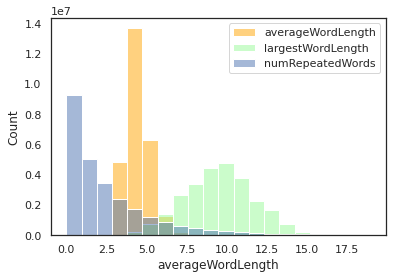

In [ ]:
# Remove very large values
print(df.shape[0])
df_no_out = df[df.largestWordLength < 20]
df_no_out = df_no_out[df_no_out.numRepeatedWords < 20]
print(df_no_out.shape[0])

sns.histplot(data=df_no_out, x='averageWordLength', color = 'orange', alpha = 0.5, bins = 20, label='averageWordLength');
sns.histplot(data=df_no_out, x='largestWordLength', color = 'palegreen', alpha = 0.5, bins = 20, label='largestWordLength');
sns.histplot(data=df_no_out, x='numRepeatedWords', alpha = 0.5, bins = 20, label='numRepeatedWords');
plt.legend()

26611588
26415506


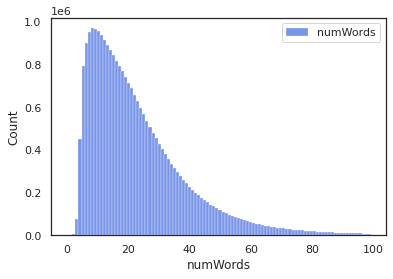

In [ ]:
# Remove very large values
print(df.shape[0])
df_no_out = df[df.numWords < 100]
print(df_no_out.shape[0])

sns.histplot(data=df_no_out, x='numWords', bins=100, color = 'royalblue', alpha = 0.7, label='numWords');
plt.legend()

26611588
26610786


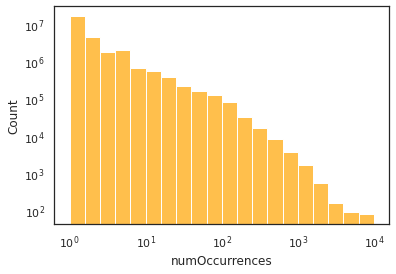

In [ ]:
# Remove very large values
print(df.shape[0])
df_no_out = df[df.numOccurrences < 10000]
print(df_no_out.shape[0])

sns.histplot(data=df_no_out, x='numOccurrences', bins=20, color = 'orange', alpha = 0.7, log_scale=(10, 10));

26611588
26451087


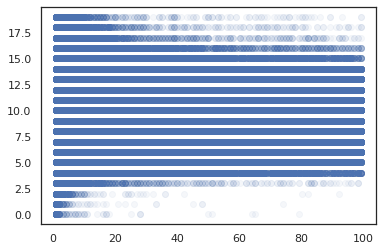

In [ ]:
# Remove very large values
print(df.shape[0])
df_no_out = df[df.numOccurrences < 100]
df_no_out = df_no_out[df_no_out.largestWordLength < 20]

print(df_no_out.shape[0])

plt.scatter(x=df_no_out.numOccurrences, y=df_no_out.largestWordLength, alpha=0.05)

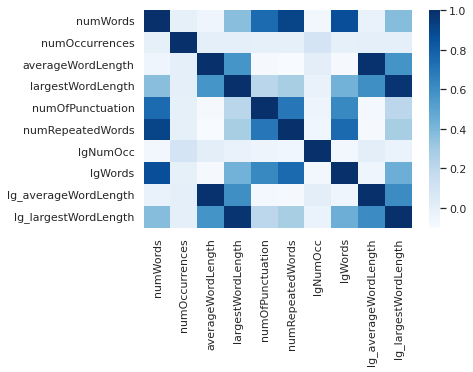

In [ ]:
sns.heatmap(df.corr(), cmap='Blues')

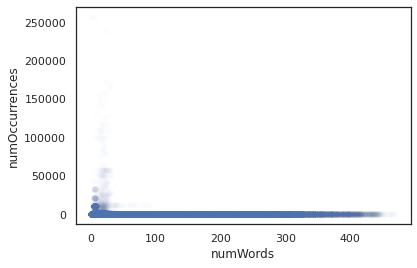

In [ ]:
sns.scatterplot(data=df, x="numWords", y="numOccurrences", alpha = 0.01);
plt.savefig('Scatter_numWords')

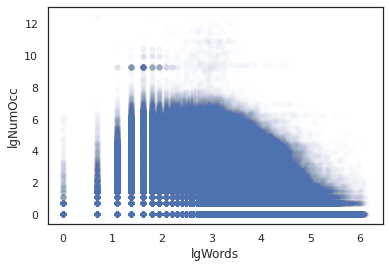

In [ ]:
sns.scatterplot(data=df, x="lgWords", y="lgNumOcc", alpha = 0.01);

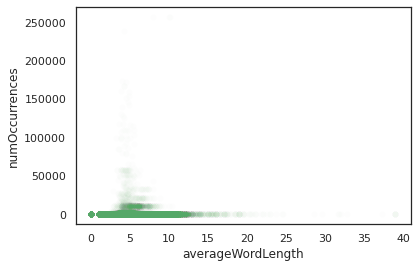

In [ ]:
sns.scatterplot(data=df, x="averageWordLength", y="numOccurrences", alpha = 0.01, color = 'g');

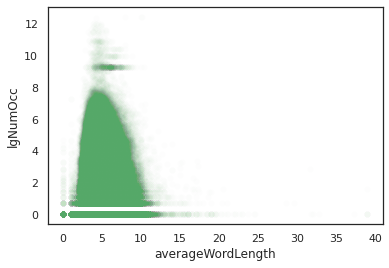

In [ ]:
sns.scatterplot(data=df, x="averageWordLength", y="lgNumOcc", alpha = 0.01, color = 'g');

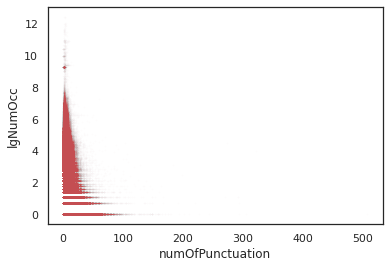

In [ ]:
sns.scatterplot(data=df, x="numOfPunctuation", y="lgNumOcc", alpha = 0.01, color = 'r', s=3);

# Google Trends Data

In [ ]:
!pip install pytrends
from pytrends.request import TrendReq
from pytrends import dailydata
import numpy as np
import pandas as pd
import time
import pickle

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
% matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
prx = ['https://35.201.123.31:880', 'https://34.203.233.13:80']
prx = ['35.199.25.215:3128']
pytrends = TrendReq(hl='en-US', tz=360, retries = 3, backoff_factor = 20,)
params = {'cat':0, 'geo':'', 'gprop':''}
path = '/content/drive/MyDrive/Quotebank/'

### Good chart

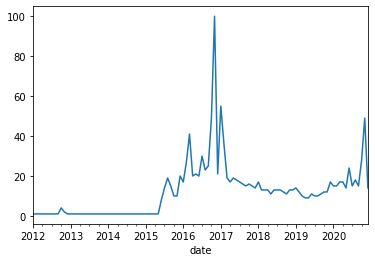

In [ ]:
pytrends.build_payload(['Donald Trump'], timeframe='2012-01-01 2020-12-01', **params)
ans = pytrends.interest_over_time()
ans.iloc[:,0].plot()

### Speaker popularity

In [ ]:
df = pd.read_csv(path+'Speakers.csv', dtype={'speaker':'object'}, parse_dates = ['date'])
df

,speaker,date
0,President Donald Trump,2017-08-25 10:00:00
1,Doug Jones,2017-12-12 00:00:00
2,Radek Sikorski,2017-03-22 00:00:00
3,Chuck Schumer,2017-11-01 00:00:00
4,David Caballero,2017-03-20 21:03:21
...,...,...
711,David Mueller,2017-08-09 00:00:00
712,Benjamin Netanyahu,2017-12-07 00:00:00
713,Hassan Ali,2017-10-14 00:00:00
714,President Donald Trump,2017-09-23 00:00:00


In [ ]:
names = set(df.speaker)
print(len(names))

skip = ['Jonathan Björklund', 'Meghan , Duchess of Sussex', 'Rodrigo Soberanes', 'Joel N. Myers']

n_files=6
for i in range(n_files):
  with open(path+f'GT_dump{i}.pickle', 'rb') as handle:
    read = pickle.load(handle)
    for n in read:
      names.remove(n[0])

names_backup = names.copy()
print(len(names))

294
4


In [ ]:
ans = []
for s in names:
  if s in skip:
    continue
  try:
    pytrends.build_payload([s], timeframe='2012-01-01 2017-12-01', **params)
    ans.append((s, pytrends.interest_over_time().iloc[:,0].values))
    time.sleep(10)
  except Exception as ex:
    with open(path+f'GT_dump{n_files}.pickle', 'wb') as handle:
      pickle.dump(ans, handle, protocol=pickle.HIGHEST_PROTOCOL)
      print('Error', ex, 'on', s)
      break
  with open(path+f'GT_dump{n_files}.pickle', 'wb') as handle:
      pickle.dump(ans, handle, protocol=pickle.HIGHEST_PROTOCOL)

print('Done')

Done


# Models

In [ ]:
import numpy as np
import bz2
import json
import pandas as pd
import time
import zipfile
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse
import xgboost as xgb
import pickle

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Quotebank/'
NS = 500000
toskip = [NS*i+i for i in range(1,1000)]
df_all = pd.read_csv(path+'quotes-2017.csv', sep = ';', skiprows = toskip, index_col=0, parse_dates=['date'], infer_datetime_format=True, #nrows = 3*10**6,
                 dtype={'numWords':np.int64, 'numOccurrences':np.int64, 'averageWordLength':np.float64, 'largestWordLength':np.int32, 
                        'numOfPunctuation':np.int32, 'numRepeatedWords':np.int32, 'numNumbers':np.int32})

for c in ['numWords','averageWordLength','largestWordLength','numOfPunctuation','numRepeatedWords']:
  high = df_all[c].quantile(0.99)
  df_all = df_all[df_all[c] <= high]

for c in ['numWords']:
  low = df_all[c].quantile(0.01) 
  df_all = df_all[df_all[c] >= high]

# Keep only those with citations
df_all = df_all[df_all['numOccurrences'] > 1]
df_all = df_all.reset_index(drop=True)
df_all

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,numWords,speaker,numOccurrences,averageWordLength,largestWordLength,numOfPunctuation,numRepeatedWords,numNumbers,date
0,37,Olivia Newton-John,14,4.16,10,10,6,0,2017-09-12 00:00:00
1,36,Radha Stirling,2,4.78,10,3,3,0,2017-10-24 23:57:43
2,16,Viral Acharya,2,4.81,13,4,1,0,2017-06-08 09:51:00
3,29,Jimmy Walker,36,3.48,8,6,3,0,2017-04-04 00:05:38
4,19,Spencer Pratt,2,4.26,9,4,2,0,2017-04-13 21:24:38
...,...,...,...,...,...,...,...,...,...
7210598,47,Angus Taylor,5,4.04,10,8,4,1,2017-08-29 08:00:00
7210599,46,None,102,4.30,8,11,6,0,2017-05-08 07:25:48
7210600,26,Greg Olsen,2,4.19,8,4,2,0,2017-12-29 15:40:18
7210601,37,Ian Rankin,2,4.24,13,7,6,0,2017-07-12 08:45:21


In [ ]:
df_all.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,numWords,numOccurrences,averageWordLength,largestWordLength,numOfPunctuation,numRepeatedWords,numNumbers
count,7.210603e+06,7.210603e+06,7.210603e+06,7.210603e+06,7.210603e+06,7.210603e+06,7.210603e+06
mean,2.650800e+01,1.058847e+01,4.395769e+00,9.941492e+00,4.023358e+00,2.669459e+00,1.307617e-01
std,1.274729e+01,3.505106e+02,6.454244e-01,2.034426e+00,2.747193e+00,2.512389e+00,4.877396e-01
min,1.200000e+01,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10%,1.400000e+01,2.000000e+00,3.620000e+00,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.700000e+01,2.000000e+00,3.930000e+00,9.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00
50%,2.300000e+01,3.000000e+00,4.330000e+00,1.000000e+01,3.000000e+00,2.000000e+00,0.000000e+00
75%,3.300000e+01,5.000000e+00,4.800000e+00,1.100000e+01,5.000000e+00,4.000000e+00,0.000000e+00
90%,4.400000e+01,1.400000e+01,5.280000e+00,1.300000e+01,8.000000e+00,6.000000e+00,0.000000e+00
99%,6.800000e+01,1.110000e+02,6.120000e+00,1.500000e+01,1.300000e+01,1.100000e+01,2.000000e+00


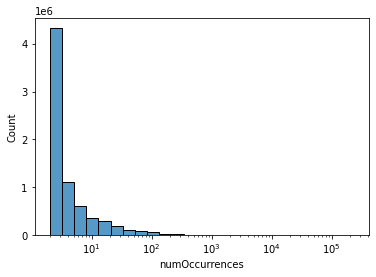

In [ ]:
sns.histplot(x=df_all.numOccurrences, bins=25, log_scale=True);

## First analysis

We do analysis on full data, but we do not have any useful results. Likely this is due to the fact that vast majority of quotes are not quoted, only 10% of sample has more than 14 quotes, and overall the data is very skewed (mean = 10 vs median = 3, also not the histogram).

Data properties and results indicate that log of occurences should be analyzed, which we will do.

In [ ]:
# Regress numOccurrences on all the numerical features
m = smf.ols('''numOccurrences ~ numWords
                + averageWordLength + largestWordLength + numOfPunctuation + numRepeatedWords + numNumbers''', 
            data=df_all).fit()
print('MSE:', mse(df_all.numOccurrences, m.predict(df_all)))
print(m.summary())

MSE: 122852.2374549396
                            OLS Regression Results                            
Dep. Variable:         numOccurrences   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     53.21
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           6.05e-66
Time:                        11:56:02   Log-Likelihood:            -5.2481e+07
No. Observations:             7210603   AIC:                         1.050e+08
Df Residuals:                 7210596   BIC:                         1.050e+08
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept      

In [ ]:
# Regress numOccurrences on all the numerical features
m = smf.ols('''np.log(numOccurrences) ~ numWords + averageWordLength
             + largestWordLength + numOfPunctuation + numRepeatedWords + numNumbers''', 
            data=df_all).fit()
print('MSE:', mse(np.log(df_all.numOccurrences), m.predict(df_all)))
print(m.summary())

MSE: 0.860248021547509
                              OLS Regression Results                              
Dep. Variable:     np.log(numOccurrences)   R-squared:                       0.006
Model:                                OLS   Adj. R-squared:                  0.006
Method:                     Least Squares   F-statistic:                     6906.
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                            11:56:10   Log-Likelihood:            -9.6887e+06
No. Observations:                 7210603   AIC:                         1.938e+07
Df Residuals:                     7210596   BIC:                         1.938e+07
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

# Only popular quotes

We have noted that most quotes are not getting a lot of citations. It would be more prudent to analyze more popular quotes, where the variation in y is greater so resulta can be assessed more accurately.

Note much smaller MSE (0.4) compared to non-restricted case (0.9) even though both samples are large.

In [ ]:
# restrict
limit = 100
df = df_all[df_all['numOccurrences'] > limit].reset_index(drop=True)
df.shape

(88638, 9)

In [ ]:
df.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,numWords,numOccurrences,averageWordLength,largestWordLength,numOfPunctuation,numRepeatedWords,numNumbers
count,88638.000000,88638.000000,88638.000000,88638.000000,88638.000000,88638.000000,88638.000000
mean,23.510560,345.611544,4.438974,9.944922,3.635179,2.199034,0.085798
std,10.311469,3141.766093,0.642694,2.036018,2.437730,2.154723,0.362423
min,12.000000,101.000000,2.140000,4.000000,0.000000,0.000000,0.000000
1%,12.000000,101.000000,3.170000,6.000000,1.000000,0.000000,0.000000
10%,13.000000,106.000000,3.650000,7.000000,1.000000,0.000000,0.000000
25%,16.000000,114.000000,4.000000,9.000000,2.000000,1.000000,0.000000
50%,21.000000,141.000000,4.390000,10.000000,3.000000,2.000000,0.000000
75%,28.000000,218.000000,4.850000,11.000000,5.000000,3.000000,0.000000
90%,38.000000,371.000000,5.300000,13.000000,7.000000,5.000000,0.000000


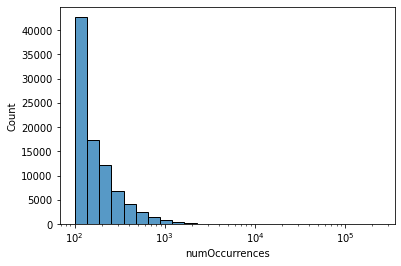

In [ ]:
sns.histplot(x=df.numOccurrences, bins=25, log_scale=True);

In [ ]:
# Regress numOccurrences on all the numerical features
m = smf.ols('''np.log(numOccurrences) ~ numWords
                + averageWordLength + largestWordLength + numOfPunctuation + numRepeatedWords + numNumbers''', 
            data=df).fit()
print('MSE:', mse(np.log(df.numOccurrences), m.predict(df)))
print(m.summary())

MSE: 0.38163611249045415
                              OLS Regression Results                              
Dep. Variable:     np.log(numOccurrences)   R-squared:                       0.022
Model:                                OLS   Adj. R-squared:                  0.022
Method:                     Least Squares   F-statistic:                     327.7
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                            11:56:11   Log-Likelihood:                -83080.
No. Observations:                   88638   AIC:                         1.662e+05
Df Residuals:                       88631   BIC:                         1.662e+05
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

## Feature engineering

OLS performs best when we have linear dependence betweeen target variable and features. This can be avoided by using nonlinear transformation of features. A classic approach is to try second order interactions. As a first step to determine whether this will improve our results, we use all possible second order interactions. We find that these do not give useful results as well - MSE does not increase significantly. Therefore we conclude that these features, although significant, contribute to a very small extent. 

In [ ]:
# Regress all the squares and interaction terms on log(numOccurrences)
names = ['numWords', 'averageWordLength', 'largestWordLength',
        'numOfPunctuation', 'numRepeatedWords', 'numNumbers']
X = df[names]
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
X = pd.DataFrame(data=X, columns=poly.get_feature_names_out(names))
m1 = sm.OLS(np.log(df.numOccurrences), X).fit()
print('MSE:', mse(np.log(df.numOccurrences), m1.predict(X)))
print(m1.summary())

MSE: 0.380196882833802
                            OLS Regression Results                            
Dep. Variable:         numOccurrences   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     85.50
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:56:11   Log-Likelihood:                -82912.
No. Observations:               88638   AIC:                         1.659e+05
Df Residuals:                   88610   BIC:                         1.661e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

## Nonlinear model

To make a complete a prudent analysis, we use state-of-the-art nonlinear regression model provided by XGBoost library. It is based on the idea of Random Forest and Gradient boosting. This model is universally acclaimed as one of the best classifier models existing, and usually outperforms most other classification methods in practice (source: their site somewhere, add link). For regression purposes, it is a great methods as well, but need to use other objective function.

Here we also use second order interactions, to be consistent and concern possible very complex nonlinearity. Our large sample size allows us to allow for more degrees of freedon without stability problems.

Model performs only slightly better than OLS, therefore we conclude that even more complex forms of nonlinearity do not explain the data well.

In [ ]:
params = {'objective': 'reg:squarederror', 'max_depth': 4, 'eta': 1, 'num_rounds':20}
xgbm = xgb.XGBRegressor(**params)
xgbm.fit(X, np.log(df.numOccurrences))
#xgbm = xgb.train(params, xgb.DMatrix(X, label=np.log(df.numOccurrences)), num_rounds)

XGBRegressor(eta=1, max_depth=4, num_rounds=20, objective='reg:squarederror')

In [ ]:
print('MSE:', mse(np.log(df.numOccurrences), xgbm.predict(X)))

MSE: 0.37272731488030325


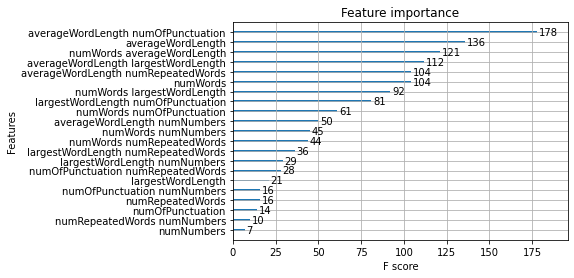

In [ ]:
xgb.plot_importance(xgbm);

## Classifier

Take sample where # of popular and not quotes are equal. Popular means numOcc > 100. Build classifier and try to predict "popular" quotes

In [ ]:
df_class = df.append(df_all[df_all.numOccurrences <= limit].sample(n=df.shape[0]), ignore_index=True)
df_class['Popular'] = df_class.numOccurrences.apply(lambda x: 1 if x>limit else 0)
df_class = df_class.drop(columns='numNumbers')
df_class

,numWords,speaker,numOccurrences,averageWordLength,largestWordLength,numOfPunctuation,numRepeatedWords,date,Popular
0,28,None,101,5.36,13,6,2,2017-05-05 12:24:13,1
1,17,None,102,4.82,10,4,0,2017-08-12 07:10:00,1
2,28,None,237,6.21,13,2,1,2017-10-24 00:00:00,1
3,15,Prime Minister Theresa May,209,5.47,9,1,0,2017-05-23 00:00:00,1
4,17,President Donald Trump,121,4.71,10,1,1,2017-11-24 09:12:00,1
...,...,...,...,...,...,...,...,...,...
177271,18,None,3,4.33,15,1,0,2017-04-14 22:59:20,0
177272,21,None,3,4.48,9,3,2,2017-06-13 07:28:49,0
177273,42,None,6,4.05,11,5,4,2017-04-10 08:00:00,0
177274,34,Stephen King,2,4.56,10,2,3,2017-05-02 07:00:00,0


In [ ]:
# Logit
names = ['numWords', 'averageWordLength', 'largestWordLength',
        'numOfPunctuation', 'numRepeatedWords']
X = df_class[names]
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
X = pd.DataFrame(data=X, columns=poly.get_feature_names_out(names))

m4 = sm.Logit(df_class.Popular, X).fit()
print('MSE:', mse(df_class.Popular, m4.predict(X)))
print(m4.summary())

Optimization terminated successfully.
         Current function value: 0.682529
         Iterations 5
MSE: 0.24481081747672673
                           Logit Regression Results                           
Dep. Variable:                Popular   No. Observations:               177276
Model:                          Logit   Df Residuals:                   177255
Method:                           MLE   Df Model:                           20
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                 0.01532
Time:                        12:00:54   Log-Likelihood:            -1.2100e+05
converged:                       True   LL-Null:                   -1.2288e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
1                                

MSE: 0.24361504484820362


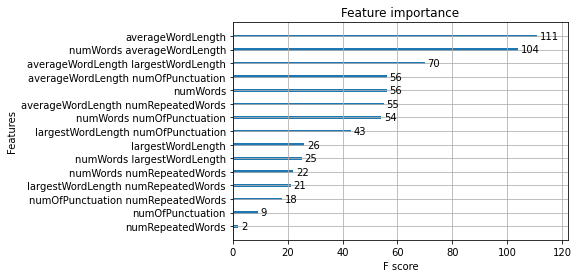

In [ ]:
params = {'objective': 'binary:logistic', 'max_depth': 3, 'eta': 1, 'num_rounds':20}
xgbm = xgb.XGBRegressor(**params)
xgbm.fit(X, df_class.Popular)
print('MSE:', mse(df_class.Popular, xgbm.predict(X)))
xgb.plot_importance(xgbm);

## Google Trends

We can obtain data from google trends via their API and pytrends library. (Description here from our git Readme). We use data for monthly popularity of a speaker.

We have taken a subsample of most popular quotes (ones with over 1000 citations), obtained list of "popular" speakers, and obtained GT data for them. We have obtained 290 unique speaker names. Note that this is by no means exhastive analysis, as

1) For correct speaker inference, we need to take name which will uniquely identify a person, and also concat all similar names to this one. Given that Quotebank data has "President Donald Trump" and "Donal Trump" as different entities, we leave it for further research.

2) GT data has strict request requirements, and for example cannot process non-ascii characters. We leave it for further research as well.

3) Our sample is limited by number of calls to Google API, after which there is a temporary search ban. 3 proxies were used to obtain a sample of 290 speakers over 2 days. Sample could be much larger, but this is enough to access its importance.


After obtaining the results, we take average popularity from 2012 to the date of quotation provided by dataset. 2012 is taken as a reasonable period over which GT data is more stable, but also relevant. Smaller periods give somewhat worse results. 

In [ ]:
# restrict again
limit = 1000
df = df[df['numOccurrences'] > limit].reset_index(drop=True)
df = df.drop(columns='numNumbers') #drop because don't really matter, and have small sample
df.shape

In [ ]:
m = smf.ols('''np.log(numOccurrences) ~ numWords
                + averageWordLength + largestWordLength + numOfPunctuation + numRepeatedWords''', 
            data=df).fit()
print('MSE:', mse(np.log(df.numOccurrences), m.predict(df)))
print(m.summary())

In [ ]:
# Regress all the squares and interaction terms on log(numOccurrences)
names = ['numWords', 'averageWordLength', 'largestWordLength',
        'numOfPunctuation', 'numRepeatedWords']
X = df[names]
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
X = pd.DataFrame(data=X, columns=poly.get_feature_names_out(names))
m1 = sm.OLS(np.log(df.numOccurrences), X).fit()
print('MSE:', mse(np.log(df.numOccurrences), m1.predict(X)))
print(m1.summary())

In [ ]:
# get most popular speakers
speakers = df[df.speaker != 'None']
print(speakers.shape)
speakers[['speaker', 'date']].to_csv(path+'Speakers.csv', index=False)

We have obtained data from second script. We merge the files, and take quotes which Quotebank credits to speakers in question. Sample is quite large. Even though this parameter is highly significant, we fail to say we have found any useful results.

In [ ]:
# get the data from results

n_files=6
n_months = 6*12
ans = []
for i in range(n_files):
  with open(path+f'GT_dump{i}.pickle', 'rb') as handle:
    read = pickle.load(handle)
    ans += read

speakers_found = [i[0] for i in ans]
ans_dict = {}
for i in ans:
  ans_dict[i[0]] = i[1]

In [ ]:
df_gt = df_all[df_all.speaker.isin(speakers_found)].reset_index(drop=1)
df_gt['months_to_2018'] = 12-df_gt.date.dt.month
df_gt['SpeakerPop'] = df_gt.apply(lambda x: np.mean(ans_dict[x['speaker']][:-(x['months_to_2018'])]), axis=1)
df_gt = df_gt[df_gt['SpeakerPop'] > 0]
df_gt = df_gt.dropna().reset_index(drop=1)
df_gt

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,numWords,speaker,numOccurrences,averageWordLength,largestWordLength,numOfPunctuation,numRepeatedWords,numNumbers,date,months_to_2018,SpeakerPop
0,35,Doug Jones,2,4.49,12,5,4,0,2017-07-19 17:07:28,5,2.064516
1,26,President Donald Trump,4,5.38,11,4,2,0,2017-09-21 00:00:00,3,13.636364
2,14,Jeremy Corbyn,2,4.79,9,0,0,0,2017-06-08 13:36:27,6,15.500000
3,25,Bob Corker,3,4.32,13,3,3,0,2017-10-24 00:00:00,2,6.941176
4,19,Rex Tillerson,4,5.63,13,6,1,0,2017-03-18 17:29:09,9,9.851852
...,...,...,...,...,...,...,...,...,...,...,...
231449,16,Ernesto Abella,21,5.00,11,1,1,0,2017-08-18 00:00:00,4,13.906250
231450,26,Mike Pence,2,4.58,13,2,2,0,2017-06-06 20:15:00,6,15.133333
231451,17,Elon Musk,5,3.59,10,2,1,1,2017-07-17 14:22:06,5,41.032258
231452,13,Anthony Scaramucci,6,3.62,7,3,0,0,2017-11-21 17:26:54,1,4.457143


In [ ]:
df_gt.describe()

,numWords,numOccurrences,averageWordLength,largestWordLength,numOfPunctuation,numRepeatedWords,numNumbers,months_to_2018,SpeakerPop
count,231454.000000,231454.000000,231454.000000,231454.000000,231454.000000,231454.000000,231454.000000,231454.000000,231454.000000
mean,25.164434,37.639216,4.524836,10.222014,3.914104,2.575881,0.091820,5.249315,18.066762
std,11.813598,992.212243,0.634666,2.020516,2.693971,2.430727,0.383907,2.749254,11.036268
min,12.000000,2.000000,1.470000,3.000000,0.000000,0.000000,0.000000,1.000000,0.030303
25%,16.000000,2.000000,4.070000,9.000000,2.000000,1.000000,0.000000,3.000000,11.187500
50%,22.000000,4.000000,4.480000,10.000000,3.000000,2.000000,0.000000,5.000000,14.818182
75%,31.000000,12.000000,4.930000,12.000000,5.000000,4.000000,0.000000,8.000000,22.205882
max,92.000000,172573.000000,6.710000,15.000000,15.000000,12.000000,8.000000,11.000000,76.625000


In [ ]:
m = smf.ols('''np.log(numOccurrences) ~ numWords + np.log(SpeakerPop)
                + averageWordLength + largestWordLength + numOfPunctuation + numRepeatedWords''', 
            data=df_gt).fit()
print('MSE:', mse(np.log(df_gt.numOccurrences), m.predict(df_gt)))
print(m.summary())

MSE: 1.6781257399058862
                              OLS Regression Results                              
Dep. Variable:     np.log(numOccurrences)   R-squared:                       0.008
Model:                                OLS   Adj. R-squared:                  0.008
Method:                     Least Squares   F-statistic:                     329.9
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                            22:11:41   Log-Likelihood:            -3.8833e+05
No. Observations:                  231454   AIC:                         7.767e+05
Df Residuals:                      231447   BIC:                         7.767e+05
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [ ]:
# Regress all the squares and interaction terms on log(numOccurrences)
names = ['numWords', 'averageWordLength', 'largestWordLength',
        'numOfPunctuation', 'numRepeatedWords', 'SpeakerPop']
X = df_gt[names]
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
X = pd.DataFrame(data=X, columns=poly.get_feature_names_out(names))
m1 = sm.OLS(np.log(df_gt.numOccurrences), X).fit()
print('MSE:', mse(np.log(df_gt.numOccurrences), m1.predict(X)))
print(m1.summary())

MSE: 1.6748944466806117
                            OLS Regression Results                            
Dep. Variable:         numOccurrences   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     89.98
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:11:42   Log-Likelihood:            -3.8811e+05
No. Observations:              231454   AIC:                         7.763e+05
Df Residuals:                  231426   BIC:                         7.766e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

## Check accounting for effects of speaker

Last step is to account for confounding features which might be associated with a speaker. We take quotes of Narendra Modi, with a total sample of 10000. We fail to find anything useful. In this sample, only number of words is statistically significant.

In [ ]:
df_nm = df_all[df_all.speaker == 'Narendra Modi'].reset_index(drop=1)
m = smf.ols('''np.log(numOccurrences) ~ numWords
                + averageWordLength + largestWordLength + numOfPunctuation + numRepeatedWords''', 
            data=df_nm).fit()
print('MSE:', mse(np.log(df_nm.numOccurrences), m.predict(df_nm)))
print(m.summary())

MSE: 0.6482046254431185
                              OLS Regression Results                              
Dep. Variable:     np.log(numOccurrences)   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                  0.009
Method:                     Least Squares   F-statistic:                     19.91
Date:                    Wed, 15 Dec 2021   Prob (F-statistic):           8.14e-20
Time:                            22:27:14   Log-Likelihood:                -12670.
No. Observations:                   10539   AIC:                         2.535e+04
Df Residuals:                       10533   BIC:                         2.539e+04
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [ ]:
# Regress all the squares and interaction terms on log(numOccurrences)
names = ['numWords', 'averageWordLength', 'largestWordLength',
        'numOfPunctuation', 'numRepeatedWords']
X = df_nm[names]
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
X = pd.DataFrame(data=X, columns=poly.get_feature_names_out(names))
m1 = sm.OLS(np.log(df_nm.numOccurrences), X).fit()
print('MSE:', mse(np.log(df_nm.numOccurrences), m1.predict(X)))
print(m1.summary())

MSE: 0.6452632688470921
                            OLS Regression Results                            
Dep. Variable:         numOccurrences   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     7.391
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.44e-21
Time:                        22:26:26   Log-Likelihood:                -12646.
No. Observations:               10539   AIC:                         2.533e+04
Df Residuals:                   10518   BIC:                         2.549e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------